![](https://raw.githubusercontent.com/docker-library/docs/master/julia/logo.png)

### Josh Day
- GitHub: https://github.com/joshday
- email: jtday2@ncsu.edu

### Resources:

[http://julialang.org](http://julialang.org)  
[http://docs.julialang.org/en/release-0.4/](http://docs.julialang.org/en/release-0.4/)  
[http://juliacomputing.com](http://juliacomputing.com)  
[John Myles White's Feb 2014 Talk](https://github.com/johnmyleswhite/UCDavis.jl/blob/master/Julia.ipynb)  
[Julia for Data Science](http://nbviewer.jupyter.org/github/bensadeghi/julia-datascience-talk/blob/master/datascience-talk.ipynb)   
http://www.stat.wisc.edu/~bates/JuliaForRProgrammers.pdf  
https://juliabox.org 


# What is Julia?
### **Julia is a high-level, high-performance dynamic programming language for technical computing**
### Aims to solve the "two language problem"
- Prototype code goes into high level language like Python, production code goes into low level language like C++

### Write high-level, abstract code that closely resembles mathematical formulas
- yet produces fast, low-level machine code that has traditionally only been generated by static languages.

### Julia is more than just "Fast R" or "Fast Matlab"
- Performance comes from features that work well together.  
- You can't just take the magic dust that makes Julia fast and sprinkle it on [language of choice]

# Julia Language Design

- Type system, optional type annotations (specify types only if you want to)
- Abstraction and multiple dispatch
- Type inference
- Metaprogramming (macros)
- Just-in-time (JIT) compilation using LLVM
- Clean, familiar syntax
- Developers have the legacy of mistakes from other languages to aid them

# Benchmarks, Time Relative to C
![](https://camo.githubusercontent.com/ca783e9f05294da6bb8dea6bdda1c43289a0fff6/687474703a2f2f692e696d6775722e636f6d2f49435862394a672e706e67)

# Why Shouldn't You Use Julia?

![](http://imgs.xkcd.com/comics/efficiency.png)

### Things are still changing  
- Typically easy fixes, you can find GitHub issue about the change.

### Much smaller than R's package ecosystem.
- No strict maintainer like CRAN (this is both good and bad)

### Julia is mainly for people building their own tools
- However, the ecosystem is growing consistently
    

    
# Number of Tagged Packages in METADATA.jl

METADATA.jl keeps track of which git commit to point to when you install a package via Julia's package manager:  


#### For packages in METADATA
- `Pkg.add("Package")`

#### Everything else
- `Pkg.clone("https://github.com/username/Package.jl")`

![](http://pkg.julialang.org/img/allver.svg)

# R is great, but...

### It was never meant for high performance computing
- http://adv-r.had.co.nz/Performance.html
    - Not a good sign when a section on performance starts with "Why is R slow?" 

### Deficiencies in the the core language 
- Some fixed with packages (devtools, roxygen2, Matrix)
- Others harder to fix (R uses an old version of BLAS)
- Some impossible to fix (clunky syntax, poor design choices)

### Only 6 active developers left (out of 20 R-Core members)
- Julia also has a small core team, but 479 people have contributed
    - https://github.com/JuliaLang/julia/graphs/contributors





   
### Doug Bates (`Matrix` and `lme4`, member of R-Core)

- "As some of you may know, I have had a (rather late) mid-life crisis and run off with another language called Julia. (http://julialang.org)"

- Doug Bates' Gibbs Example
    - Hua Zhou's [R Code](http://hua-zhou.github.io/teaching/st790-2015spr/gibbs_r.html)
    - Hua Zhou's [Julia Code](http://hua-zhou.github.io/teaching/st790-2015spr/gibbs_julia.html)

# Personal Note: Why Did I Convert to Julia From R?

- I need to write for loops
    - https://github.com/joshday/OnlineStats.jl
- I can get performance with RCpp, but Julia is better in terms of:
    - Development time
    - Abstraction (write less code)
        - Example: https://github.com/joshday/SparseRegression.jl
            - < 500 lines of code to produce solution paths for 7 different models with 4 different penalties.
- My code is readable
- Other people's code is readable (and available on GitHub)
- Development tools (`@time`, list comprehensions, good built in profiler, etc.)

# Hierarchical Type Structure

- **Abstract types**: `AbstractArray`, `AbstractString`
- **Concrete types**: 
    - `[1 0; 0 1]` 
        - `Array{Int64,2} == Matrix{Int}`
    - `"This is the greek letter alpha: α"` 
        - `UTF8String`

### When thinking about types, think about sets
Example: real numbers are a subset of numbers.  

`Float64 <: AbstractFloat <: Real <: Number <: Any`

Explore type hierarchy with `typeof()`, `super()`, and `subtypes()`

In [74]:
# Built-in types
@show typeof(1)
@show typeof(1.0)
@show Real <: Number  # Is Real a subtype of Number?
@show Vector <: Any  # Everything is a subtype of Any
;

typeof(1) = Int64
typeof(1.0) = Float64
Real <: Number = true
Vector <: Any = true


In [75]:
module Temp

# User defined types
type PValue <: Number
    p::Float64
end

function PValue(p::Real) 
    @assert 0 <= p <= 1
    PValue(p)
end

end # Module

Temp.PValue(.5)

Temp.PValue(0.5)

In [35]:
module Temp

# Templated types
type MyType{T <: Real}
    a::T
end

end # module

@show Temp.MyType(20)
@show Temp.MyType(20.0);

Temp.MyType(20) = Temp.MyType{Int64}(20)
Temp.MyType(20.0) = Temp.MyType{Float64}(20.0)


# Functions and Multiple Dispatch

In [36]:
# short form function definition
f(α, β) = α + β

# long form function definition
function f(α, β)
    α + β
end;

### We can look at LLVM code for two different function calls.

### Julia compiles different methods depending on the parameters! 

**NOTE**: The first time you call a new method, it will get compiled.  Thus, the first time you run something can be considerably slower than the second time.

In [76]:
@code_llvm f(1, 1)


define i64 @julia_f_26486(i64, i64) {
top:
  %2 = add i64 %1, %0
  ret i64 %2
}


In [77]:
@code_llvm f(1.0, 1.0)


define double @julia_f_25990(double, double) {
top:
  %2 = fadd double %0, %1
  ret double %2
}


In [79]:
# Type annotations
f(s::AbstractString) = "My string is: $(1 + 6)"
@show f(1, 1)
@show f("hello");

f(1,1) = 2
f("hello") = "My string is: 7"


In [80]:
# Since type annotations aren't necessary, they're best used for
#  1) reminding yourself what your function does
#  2) ensure you're not using the function in a way you're not supposed to

# Suppose I want a function to add two Real numbers

function addtwo(x, y)  # this is ugly. I'm looking at you, R.
    @assert typeof(x) <: Real
    @assert typeof(y) == typeof(x)
    x + y
end

addtwo{T <: Real}(a::T, b::T) = a + b  # this is nice (templated function)

# Type annotations are helpful when looking up methods
methods(addtwo)

# 2 methods for generic function "addtwo":
addtwo{T<:Real}(a::T<:Real, b::T<:Real) at In[80]:13
addtwo(x, y) at In[80]:8

# One More Multiple Dispatch Example

### A carefully designed type structure can save you many lines of code

In [41]:
f(A::AbstractVector) = 0
f(A::Vector) = 1
f(A::Vector{Int}) = 2

Vector{Int} <: Vector <: AbstractVector

true

In [42]:
y1 = 1:5  
y2 = zeros(5)
y3 = zeros(Int, 5)

@show typeof(y1)
@show typeof(y2)
@show typeof(y3);

typeof(y1) = UnitRange{Int64}
typeof(y2) = Array{Float64,1}
typeof(y3) = Array{Int64,1}


In [43]:
@show f(y1)
@show f(y2)
@show f(y3);

f(y1) = 0
f(y2) = 1
f(y3) = 2


# Pass by Reference

When you call a function in R, a copy of each argument is made.  

In contrast, Julia passes arguments by reference.  This means functions can change the underlying data of your arguments.

Julia's convention is for **mutating** functions to end in `!`.  Doing operations in place can have a big impact on performance.

In [44]:
using Benchmarks

A = zeros(50_000, 500)
B = randn(50_000, 500)

@show @benchmark copy(B)
@show @benchmark copy!(A, B)

A == B

@benchmark(copy(B)) = ================ Benchmark Results ========================
     Time per evaluation: 103.65 ms [100.89 ms, 106.40 ms]
Proportion of time in GC: 11.48% [9.57%, 13.40%]
        Memory allocated: 190.73 mb
   Number of allocations: 2 allocations
       Number of samples: 100
   Number of evaluations: 100
 Time spent benchmarking: 10.84 s

@benchmark(copy!(A,B)) = ================ Benchmark Results ========================
     Time per evaluation: 26.90 ms [25.66 ms, 28.14 ms]
Proportion of time in GC: 0.00% [0.00%, 0.00%]
        Memory allocated: 0.00 bytes
   Number of allocations: 0 allocations
       Number of samples: 100
   Number of evaluations: 100
 Time spent benchmarking: 2.93 s


true

# Macros

### A macro is a function of an expression.  

### Macros change the expression before it is evaluated.

In [82]:
x = rand(3)

# Why does this need to be a macro?
@show sum(x);

sum(x) = 1.6940033348944792


In [85]:
x = zeros(1000)
@time for i in eachindex(x)
    # turn off bounds checking
    # faster, but unsafe
    @inbounds x[i] += f(i, i+1)  
end
x[1:5]

5-element Array{Float64,1}:
  3.0
  5.0
  7.0
  9.0
 11.0

0.000232 seconds (5.21 k allocations: 97.125 KB)


# Plotting

**NOTE: There is no built-in plotting library in Julia**

### Popularity of Plotting Packages


| Package      | Watch | Star | Fork |
|--------------|-------|------|------|
| *Gadfly*     | 63    | 834  | 139  |
| *Winston*    | 16    | 111  | 49   |
| *PyPlot*     | 11    | 98   | 40   |
| *Vega*       | 8     | 52   | 15   |
| *Immerse*    | 11    | 37   | 6    |


### My recommendation: [Plots.jl](https://github.com/tbreloff/Plots.jl)
  - Learn one API for multiple plotting backends
  - Animations, add more data (features the backend may not support itself)
  - I typically stick with the `gadfly()` and `plotlyjs()` backends

In [87]:
using Plots
plotlyjs()  # Use Plotly backend

y1 = randn(100)
y2 = rand(100) + 3
scatter(hcat(y1, y2), labels = ["one" "two"], ms = 4)
ylabel!("Y")
plot!(cumsum(randn(100)))

In [88]:
gadfly()  # Use gadfly backend
x = zeros(3)
p = plot(x')  # empty plot of three series
anim = Animation()
for i in 1:100
    x += randn(3)
    push!(p, i, x)
    frame(anim)
end
gif(anim)

INFO: Saved animation to /Users/joshday/github/JuliaLecture/tmp.gif


Plots.AnimatedGif("/Users/joshday/github/JuliaLecture/tmp.gif")

# Linear Algebra

### Basic indexing

In [90]:
x = randn(5, 5)  # 5 × 5 matrix of random Normal(0, 1)

5x5 Array{Float64,2}:
 -0.209894   0.631468   0.637214    0.233178    0.972219 
  1.74095    1.23283    1.21986     0.333422   -0.0893601
  0.267412   0.580177  -0.716401    0.579319    0.873872 
  0.542097   1.64497    0.0977349  -0.0930469  -0.727456 
  0.24422   -0.359567   1.4707     -2.26301     1.73948  

In [50]:
# get first column
x[:, 1]

5-element Array{Float64,1}:
 -0.50593 
 -0.590458
 -0.444983
  1.06935 
 -1.83095 

In [51]:
# get first row
x[1, :]

1x5 Array{Float64,2}:
 -0.50593  -0.658969  -1.05923  0.589484  0.409097

In [91]:
x[2:end, 1:end-2]

4x3 Array{Float64,2}:
 1.74095    1.23283    1.21986  
 0.267412   0.580177  -0.716401 
 0.542097   1.64497    0.0977349
 0.24422   -0.359567   1.4707   

### Support for Sparse Matrices

In [95]:
x = sprandn(10, 10, .1)

10x10 sparse matrix with 11 Float64 entries:
	[2 ,  1]  =  1.12896
	[5 ,  2]  =  0.096914
	[5 ,  3]  =  -0.0458879
	[6 ,  3]  =  -0.68398
	[10,  4]  =  -0.865462
	[1 ,  7]  =  0.516114
	[5 ,  7]  =  -0.508478
	[6 ,  7]  =  -0.779977
	[5 ,  8]  =  -0.543308
	[9 ,  9]  =  -1.59899
	[1 , 10]  =  1.65283

### [Call BLAS Functions Directly](http://docs.julialang.org/en/release-0.4/stdlib/linalg/?highlight=blas#module-Base.LinAlg.BLAS)

In [97]:
y = zeros(10)
x = ones(10)
@time BLAS.axpy!(0.5, x, y)  # y = 0.5 * x + y
@time y = .5 *x + y

10-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

0.000004 seconds (4 allocations: 160 bytes)
  0.001017 seconds (69 allocations: 3.250 KB)


# [JuliaStats](http://juliastats.github.io)

### Organization for many statistical packages in Julia

- [Distributions.jl](https://github.com/JuliaStats/Distributions.jl)
    - Mature, very well made
- [StatsBase.jl](https://github.com/JuliaStats/StatsBase.jl)
    - Incomplete, covers much of the statistics functionality in Base R 
- [DataFrames.jl](https://github.com/JuliaStats/DataFrames.jl)
    - Good, but slow.  Working with missing data adds type uncertainty.  Underlying structure will probably see a very big change soon.
- [GLM.jl](https://github.com/JuliaStats/GLM.jl)
    - Covers `lm`, `glm` functionality from R
- Clustering.jl, NMF.jl, TimeSeries.jl, KernelDensity.jl, ...

In [98]:
using Distributions, Plots

# each distribution is a type
d = Gamma(5, 1)

# Many methods exist for distribution types:
# mean, var, params, skewness, rand, pdf, cdf, logpdf, quantile...

# anonymous functions
pdf_cdf = [
    x -> pdf(d, x),
    x -> cdf(d, x)
]

@show typeof(pdf_cdf)

plotlyjs()
plot(pdf_cdf, 0, 15)

typeof(pdf_cdf) = Array{Function,1}

In [99]:
# Support for mixtures
d = MixtureModel(Normal, [(0, 1), (3, 2)])
plot(x -> pdf(d, x), -5, 10)
plot!([x -> probs(d)[i] * pdf(components(d)[i], x) for i in 1:2])

# StatsBase

- Provides many common functions in base R that are not in base Julia (sampling, weighted statistics etc.).

- Also provides many function names (`coef`, `coeftable`, `predict`, etc.) to help packages avoid name conflicts

In [100]:
using StatsBase

sample(1:10, 10, replace = false)

10-element Array{Int64,1}:
  2
 10
  6
  5
  1
  8
  4
  3
  7
  9

# DataFrames

- Exactly what it sounds like
- Adds support for missing data

In [101]:
using DataFrames

df = DataFrame(x = 1:10, y = randn(10))
df[:y][5] = NA
df

,x,y
1,1,-1.0889294596123082
2,2,-1.1849483438290997
3,3,0.43777679715660905
4,4,-0.1554690356357033
5,5,NA
6,6,-0.746191151154702
7,7,1.5122025936853287
8,8,-0.7749957152093195
9,9,-1.3257914211922026
10,10,-0.1872596757585786


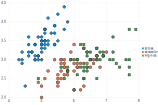

In [102]:
using RDatasets, Plots, DataFrames
gadfly()

iris = dataset("datasets", "iris");

# Scatter plot with some custom settings
# scatter(iris, :SepalLength, :SepalWidth, group=:Species)
scatter(iris[:SepalLength], iris[:SepalWidth], group = iris[:Species], m=[:+ :h :x])

In [103]:
# Get mean(PetalLength) by species

by(iris, :Species, df -> mean(df[:PetalLength]) )

,Species,x1
1,setosa,1.462
2,versicolor,4.26
3,virginica,5.552


# [Convex.jl](https://github.com/JuliaOpt/Convex.jl)

### The Julia version of CVX

[Supported Operations](http://convexjl.readthedocs.org/en/latest/operations.html)

# See Also: [JuMP.jl](https://github.com/JuliaOpt/JuMP.jl)

### Example 1:  LASSO solver

In [104]:
module LassoSolver
using Convex, Mosek

# Penalty formulation
function lasso(x, y, λ)
    n, p = size(x)
    β = Variable(p)
    problem = minimize(sumsquares(y - x * β) / n + λ * sumabs(β))
    solve!(problem, MosekSolver())
    return β.value
end

# Constrained optimization formulation
function lasso2(x, y, t)
    n, p = size(x)
    β = Variable(p)
    problem = minimize(sumsquares(y - x * β) / n, [sumabs(β) <= t])
    # You can add constraints after making the problem
    # problem.constraints += β >= 0
    solve!(problem, MosekSolver())
    return β.value
end

end

LassoSolver

In [105]:
import LassoSolver

# create some fake data
n, p = 1000, 10
x = randn(n, p)
β = Float64[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = x * β + randn(n)

LassoSolver.lasso(x, y, 4)

Computer
  Platform               : MACOSX/64-X86   


10x1 Array{Float64,2}:
 2.75901e-5
 3.77647e-5
 1.02072   
 2.03963   
 3.39984   
 4.16478   
 4.97115   
 6.36586   
 6.95454   
 8.12612   


Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1026            
  Cones                  : 2               
  Scalar variables       : 1027            
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Conic interior-point optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Total number of eliminations : 11
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Eliminator - elim's                 : 11              
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Optimizer  - threads                : 8            

In [106]:
LassoSolver.lasso2(x, y, 20)

Computer
  Platform               : MACOSX/64-X86   


10x1 Array{Float64,2}:
 3.87288e-6
 5.75637e-6
 1.76941e-5
 4.73277e-5
 1.4427    
 1.70459   
 2.48285   
 4.16794   
 4.39833   
 5.80344   


Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1027            
  Cones                  : 2               
  Scalar variables       : 1027            
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Conic interior-point optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Total number of eliminations : 10
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Eliminator - elim's                 : 10              
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Optimizer  - threads                : 8            

# If you want to start using Julia:

Packages you may want to look at:

- https://github.com/JuliaStats/RCall.jl
    - Call R code from Julia
- The packages in the JuliaStats organization: http://juliastats.github.io
- https://github.com/simonster/GLMNet.jl
- Do all your work inside a module
    - constants/types cannot be redefined in `Main`